In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import seaborn as sns
import pandas as pd
import panel as pn
import matplotlib.pyplot as plt
import os
os.chdir('/Users/felixelias/Downloads/Sentiment_portfolio/news_data2')

In [33]:
tickers_df= pd.read_csv("final_tickers.csv").reset_index() #download 25 random stock tickers from: https://randomstockpicker.page/
tickers= tickers_df['ticker'].to_list()

ticker_news=[] #list of all the news data file names. Will be used to run a for loop for analyzing sentiment
for ticker in tickers:
    ticker_file= f'{ticker}.csv'
    ticker_news.append(ticker_file)

In [34]:
def sentiment(df):

    #load model and tokenizer
    
    model_name= "nlptown/bert-base-multilingual-uncased-sentiment" #name of the model that will be used
    tokenizer=AutoTokenizer.from_pretrained(model_name) #breaks text into pieces
    model= AutoModelForSequenceClassification.from_pretrained(model_name) #load already trained model from Hugging Face

    def analyze_sentiment(summary):
        #tokenize and prepare input
        inputs= tokenizer(str(summary), return_tensors='pt', truncation= True, padding=True) #convert text into tokens
    
        with torch.no_grad(): #tells pytorch that the model is just for predictions with no training
            outputs=model(**inputs)
    
        #get predicted sentiment
        sentiment_scores= outputs.logits #returns raw scores for each class
        predicted_class= torch.argmax(sentiment_scores, dim=1).item() #pickes the class with the highest score
    
        #return the sentiment as numeric value from 1 to 5
        sentiment_value = predicted_class +1 #To convert zero indexed to 1 indexed
        return sentiment_value

    df['sentiments'] = df['summary'].apply(analyze_sentiment)

    sentiment_labels= ['very negative', 'negative', 'neutral', 'positive', 'very positive']
    
    def get_sentiment_label(score):
        #Since the sentiment scores are 1-based and sentiment labels are zero_based
        return sentiment_labels[score-1]
    
    #add new column for sentiment labels
    df["sentiment_label"] =df['sentiments'].apply(get_sentiment_label)
    return df

In [ ]:
output_dir='/Users/felixelias/Downloads/Sentiment_portfolio/news_sentiment2'
os.chdir('/Users/felixelias/Downloads/Sentiment_portfolio/news_data2')
for file in ticker_news:
    df=pd.read_csv(file) # file will be for iteration
    df['datetime']=pd.to_datetime(df['datetime']).dt.date
    df_sen= sentiment(df)

    # Build the full file path
    file_name = f'{file}sentiment.csv'  # Make sure 'file' is defined earlier
    file_path = os.path.join(output_dir, file_name)

    # Save the DataFrame
    df_sen.to_csv(file_path, index=False)

In [38]:
os.chdir('/Users/felixelias/Downloads/Sentiment_portfolio')
df_stocks= pd.read_csv('stocks_return.csv')

In [39]:
df_stocks.isnull().sum()

Date    0
AAP     1
ARES    1
BDC     1
BIGC    1
CNC     1
CRM     1
ESTC    1
GRPN    1
JEF     1
LEG     1
LZB     1
MU      1
OKE     1
PBF     1
SPR     1
USB     1
VRSN    1
dtype: int64

In [41]:
#drop GBTG stock due to many null values
df_stocks= df_stocks.dropna()

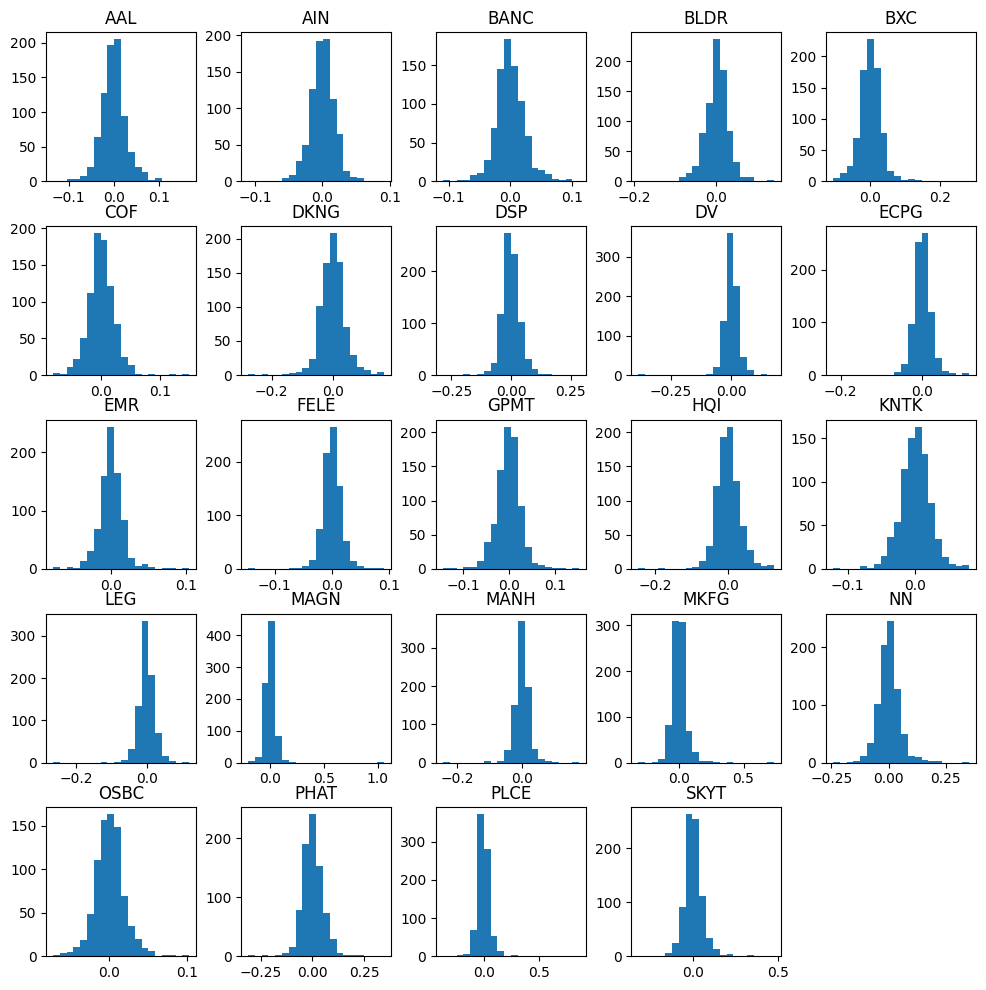

In [20]:
df_stocks.hist(figsize=(12,12), bins=20 ,grid=False);

In [42]:
df_stocks.head()

,Date,AAP,ARES,BDC,BIGC,CNC,CRM,ESTC,GRPN,JEF,LEG,LZB,MU,OKE,PBF,SPR,USB,VRSN
1,2022-01-04,0.001140,-0.002525,-0.000770,-0.076305,-0.018996,-0.028302,-0.027599,-0.015281,0.020248,0.035403,0.034586,0.006162,0.023504,0.016405,0.049177,0.026192,-0.006664
2,2022-01-05,-0.002531,-0.061907,-0.019892,-0.072174,-0.015910,-0.082826,-0.067515,-0.040121,-0.025552,-0.004918,-0.043432,-0.020137,-0.012378,-0.013333,-0.019512,-0.005275,-0.027632
3,2022-01-06,0.021992,-0.002159,-0.008024,0.004061,-0.043239,0.006501,0.003413,-0.047713,0.023931,-0.012944,0.001926,0.013242,0.016656,0.095306,-0.008652,0.027198,-0.006940
4,2022-01-07,-0.014732,0.014336,-0.028549,0.016179,0.000000,-0.003666,-0.005239,-0.020290,0.003978,0.000477,-0.008515,-0.012546,0.013138,0.058441,0.035348,0.015820,-0.016996
5,2022-01-10,-0.016632,-0.004134,-0.012082,0.032149,0.019649,0.005782,0.035021,-0.023246,0.003715,-0.004052,-0.004709,-0.005929,-0.026897,0.010430,-0.019389,0.005902,-0.004670


In [43]:
df_stocks.to_csv('stock_return_cleaned.csv')

In [24]:
df_factor= pd.read_csv('factor_data.csv')

In [44]:
df_factor= df_factor.dropna()
df_factor.to_csv('factor_cleaned.csv')